Se extrajeron 13 coordenadas de parques de bomberos.


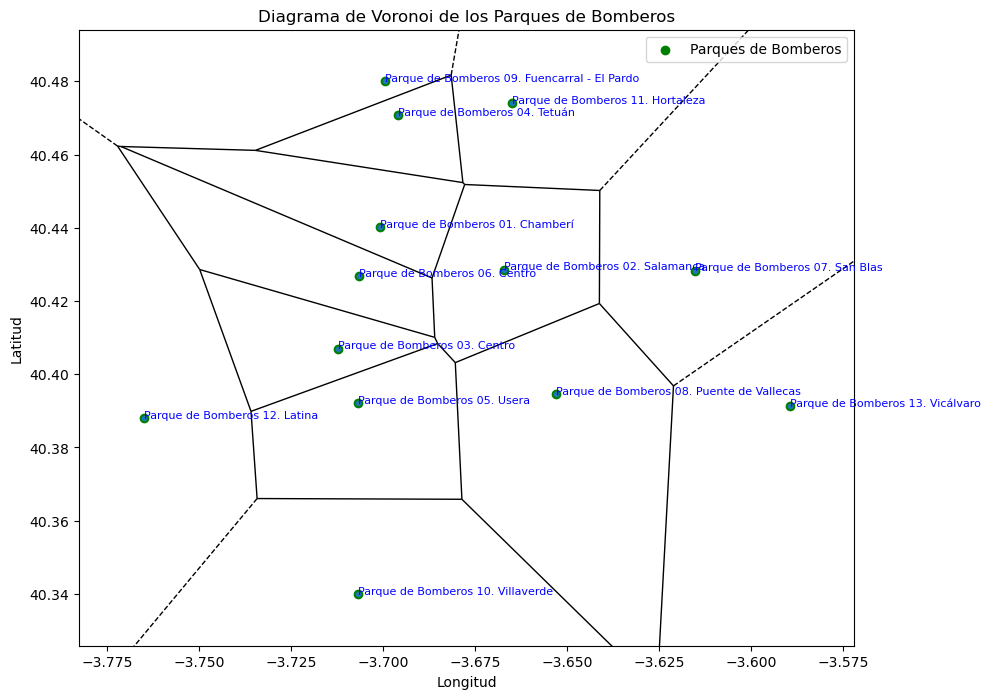

In [ ]:
import json
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Cargar el archivo JSON con la codificación adecuada (UTF-8)
with open('bomberos-parques.json', 'r', encoding='utf-8') as f:
    bomberos_parques = json.load(f)

# Extraer las coordenadas de los parques de bomberos
coordenadas_bomberos = []
parques_con_coordenadas = []  # Para almacenar los parques con coordenadas válidas
for parque in bomberos_parques['@graph']:
    # Obtener las coordenadas de latitud y longitud
    latitud = parque.get('location', {}).get('latitude')
    longitud = parque.get('location', {}).get('longitude')
    
    if latitud is not None and longitud is not None:
        coordenadas_bomberos.append((longitud, latitud))  # Añadir longitud primero
        parques_con_coordenadas.append(parque)  # Guardar el parque correspondiente

# Verificar cuántas coordenadas se extrajeron
print(f"Se extrajeron {len(coordenadas_bomberos)} coordenadas de parques de bomberos.")

# Convertir la lista de coordenadas a un array de NumPy
coordenadas_bomberos = np.array(coordenadas_bomberos)

# Crear el diagrama de Voronoi
vor = Voronoi(coordenadas_bomberos)

# Graficar el diagrama de Voronoi
fig, ax = plt.subplots(figsize=(10, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False)

# Mostrar los parques de bomberos como puntos en el gráfico
ax.scatter(coordenadas_bomberos[:, 0], coordenadas_bomberos[:, 1], color='green', label='Parques de Bomberos')

# Etiquetar los parques de bomberos
for i, parque in enumerate(parques_con_coordenadas):  # Iterar sobre los parques con coordenadas válidas
    ax.text(coordenadas_bomberos[i, 0], coordenadas_bomberos[i, 1], str(parque['title']), fontsize=8, color='blue')

plt.title('Diagrama de Voronoi de los Parques de Bomberos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()
plt.savefig('diagrama_voronoi_parques_bomberos.png', bbox_inches='tight')
